<a href="https://colab.research.google.com/github/nitinranjansharma/EVA5B2/blob/main/s9/s9_workflow_notebook_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2021-02-06 17:24:54.437159


In [2]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [3]:
import albumentations as A
import torchvision.transforms as transforms
import torch
from PIL import Image
from albumentations.pytorch import ToTensor
from plot_graph import plot_images, plot_graph
from utilities import *


In [4]:
## importing and transforming data
from read_inputs import read_transform_inputs
trainset, trainloader, testset, testloader, classes = read_transform_inputs()

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 frog  deer truck   cat


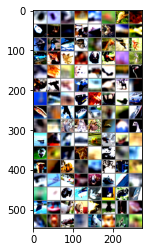

In [5]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
## defining model

from define_model import ResNet
from define_model import BasicBlock
from define_model import Bottleneck
!pip install torchsummary
from torchsummary import summary
from quiz_dnn import QuizDNN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = QuizDNN()
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [7]:
##defining optimiser
from define_optim import optim_define
optimizer = optim_define(model)

In [8]:
## defining accuracy check and defining the training class
from truth_checker import truth_checker
from training_class import training_class
clf = training_class(model=model,trainloader = trainloader,testloader= testloader,device=device,
                     epoch=5,optimizer=optimizer)

In [ ]:
#clf.fit()

In [9]:
from train import train
from test import test
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

epochs = 40
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.1, epochs=epochs,
                       steps_per_epoch=len(trainloader))

def run(l1_decay=0.0, l2_decay=0.0):
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(epochs):
      print("EPOCH:", epoch+1)
      train(model, device, trainloader, criterion, optimizer, epoch, l1_decay, l2_decay, scheduler)
      test(model, device, testloader, criterion, classes, test_losses, test_accs,
           misclassified_imgs, correct_imgs, epoch==epochs-1)
  return test_losses, test_accs, misclassified_imgs, correct_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs, correct_imgs = run(l1_decay=3e-6, l2_decay=1e-3)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


L2_loss=116.75121307373047 L1_loss=6968.3388671875 Loss=1.9241348505020142 Batch_id=390 Accuracy=30.09: 100%|██████████| 391/391 [00:26<00:00, 14.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0124, Accuracy: 4279/10000 (42.79%)

EPOCH: 2


L2_loss=119.29163360595703 L1_loss=7153.0068359375 Loss=1.8452653884887695 Batch_id=390 Accuracy=37.45: 100%|██████████| 391/391 [00:26<00:00, 14.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0114, Accuracy: 4761/10000 (47.61%)

EPOCH: 3


L2_loss=123.28294372558594 L1_loss=7539.74951171875 Loss=1.7562501430511475 Batch_id=390 Accuracy=41.47: 100%|██████████| 391/391 [00:26<00:00, 14.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0108, Accuracy: 5009/10000 (50.09%)

EPOCH: 4


L2_loss=128.900390625 L1_loss=8171.63671875 Loss=1.6947582960128784 Batch_id=390 Accuracy=44.06: 100%|██████████| 391/391 [00:26<00:00, 14.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0096, Accuracy: 5565/10000 (55.65%)

EPOCH: 5


L2_loss=134.9846954345703 L1_loss=8938.9794921875 Loss=1.5344215631484985 Batch_id=390 Accuracy=46.27: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0090, Accuracy: 5889/10000 (58.89%)

EPOCH: 6


L2_loss=141.70909118652344 L1_loss=9844.677734375 Loss=1.5501153469085693 Batch_id=390 Accuracy=48.72: 100%|██████████| 391/391 [00:26<00:00, 14.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 6077/10000 (60.77%)

EPOCH: 7


L2_loss=147.72274780273438 L1_loss=10697.8291015625 Loss=1.6239259243011475 Batch_id=390 Accuracy=50.55: 100%|██████████| 391/391 [00:26<00:00, 14.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 6451/10000 (64.51%)

EPOCH: 8


L2_loss=152.83460998535156 L1_loss=11508.3232421875 Loss=1.5373225212097168 Batch_id=390 Accuracy=52.32: 100%|██████████| 391/391 [00:26<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 6388/10000 (63.88%)

EPOCH: 9


L2_loss=157.3599090576172 L1_loss=12267.4755859375 Loss=1.5192713737487793 Batch_id=390 Accuracy=53.97: 100%|██████████| 391/391 [00:26<00:00, 14.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 6779/10000 (67.79%)

EPOCH: 10


L2_loss=161.32525634765625 L1_loss=12967.7109375 Loss=1.3258609771728516 Batch_id=390 Accuracy=55.01: 100%|██████████| 391/391 [00:26<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 6651/10000 (66.51%)

EPOCH: 11


L2_loss=164.6493377685547 L1_loss=13569.1923828125 Loss=1.4886529445648193 Batch_id=390 Accuracy=55.99: 100%|██████████| 391/391 [00:26<00:00, 14.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 6855/10000 (68.55%)

EPOCH: 12


L2_loss=167.9209747314453 L1_loss=14148.525390625 Loss=1.5044291019439697 Batch_id=390 Accuracy=56.86: 100%|██████████| 391/391 [00:26<00:00, 14.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 7129/10000 (71.29%)

EPOCH: 13


L2_loss=170.27403259277344 L1_loss=14642.08984375 Loss=1.2409049272537231 Batch_id=390 Accuracy=57.58: 100%|██████████| 391/391 [00:26<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7062/10000 (70.62%)

EPOCH: 14


L2_loss=172.65789794921875 L1_loss=15086.64453125 Loss=1.8200666904449463 Batch_id=390 Accuracy=58.65: 100%|██████████| 391/391 [00:26<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 7286/10000 (72.86%)

EPOCH: 15


L2_loss=174.66226196289062 L1_loss=15506.865234375 Loss=1.2860376834869385 Batch_id=390 Accuracy=58.77: 100%|██████████| 391/391 [00:26<00:00, 14.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 7181/10000 (71.81%)

EPOCH: 16


L2_loss=176.4751434326172 L1_loss=15863.392578125 Loss=1.3130784034729004 Batch_id=390 Accuracy=59.46: 100%|██████████| 391/391 [00:26<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7334/10000 (73.34%)

EPOCH: 17


L2_loss=178.29319763183594 L1_loss=16181.9189453125 Loss=1.2930275201797485 Batch_id=390 Accuracy=60.07: 100%|██████████| 391/391 [00:26<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7377/10000 (73.77%)

EPOCH: 18


L2_loss=179.9180145263672 L1_loss=16491.423828125 Loss=1.3905744552612305 Batch_id=390 Accuracy=61.02: 100%|██████████| 391/391 [00:26<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 7277/10000 (72.77%)

EPOCH: 19


L2_loss=181.5575408935547 L1_loss=16764.578125 Loss=1.3347710371017456 Batch_id=390 Accuracy=61.28: 100%|██████████| 391/391 [00:26<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7417/10000 (74.17%)

EPOCH: 20


L2_loss=182.73822021484375 L1_loss=17011.5078125 Loss=1.360205054283142 Batch_id=390 Accuracy=61.62: 100%|██████████| 391/391 [00:26<00:00, 14.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7400/10000 (74.00%)

EPOCH: 21


L2_loss=184.25515747070312 L1_loss=17233.658203125 Loss=1.3268733024597168 Batch_id=390 Accuracy=61.86: 100%|██████████| 391/391 [00:26<00:00, 14.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7390/10000 (73.90%)

EPOCH: 22


L2_loss=185.51773071289062 L1_loss=17430.68359375 Loss=1.4071089029312134 Batch_id=390 Accuracy=62.31: 100%|██████████| 391/391 [00:26<00:00, 14.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 7603/10000 (76.03%)

EPOCH: 23


L2_loss=186.5144500732422 L1_loss=17606.7421875 Loss=1.3021953105926514 Batch_id=390 Accuracy=62.36: 100%|██████████| 391/391 [00:26<00:00, 14.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 7573/10000 (75.73%)

EPOCH: 24


L2_loss=187.39259338378906 L1_loss=17743.65625 Loss=1.5022355318069458 Batch_id=390 Accuracy=62.99: 100%|██████████| 391/391 [00:26<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7688/10000 (76.88%)

EPOCH: 25


L2_loss=187.8512420654297 L1_loss=17841.73046875 Loss=1.0633444786071777 Batch_id=390 Accuracy=63.43: 100%|██████████| 391/391 [00:26<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 7609/10000 (76.09%)

EPOCH: 26


L2_loss=188.57435607910156 L1_loss=17935.734375 Loss=1.4457885026931763 Batch_id=390 Accuracy=63.93: 100%|██████████| 391/391 [00:26<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 7680/10000 (76.80%)

EPOCH: 27


L2_loss=188.810546875 L1_loss=18003.6953125 Loss=1.1284444332122803 Batch_id=390 Accuracy=64.07: 100%|██████████| 391/391 [00:26<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 7651/10000 (76.51%)

EPOCH: 28


L2_loss=189.08383178710938 L1_loss=18050.87109375 Loss=1.272189736366272 Batch_id=390 Accuracy=64.37: 100%|██████████| 391/391 [00:26<00:00, 14.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7680/10000 (76.80%)

EPOCH: 29


L2_loss=189.32369995117188 L1_loss=18082.001953125 Loss=1.3153579235076904 Batch_id=390 Accuracy=65.02: 100%|██████████| 391/391 [00:26<00:00, 14.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 7771/10000 (77.71%)

EPOCH: 30


L2_loss=189.37213134765625 L1_loss=18092.58203125 Loss=1.0962586402893066 Batch_id=390 Accuracy=65.24: 100%|██████████| 391/391 [00:26<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7916/10000 (79.16%)

EPOCH: 31


L2_loss=189.14010620117188 L1_loss=18080.990234375 Loss=1.2038747072219849 Batch_id=390 Accuracy=65.65: 100%|██████████| 391/391 [00:26<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7866/10000 (78.66%)

EPOCH: 32


L2_loss=188.55966186523438 L1_loss=18043.26171875 Loss=1.1689510345458984 Batch_id=390 Accuracy=66.36: 100%|██████████| 391/391 [00:26<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7873/10000 (78.73%)

EPOCH: 33


L2_loss=187.80206298828125 L1_loss=17988.4453125 Loss=1.0554393529891968 Batch_id=390 Accuracy=67.07: 100%|██████████| 391/391 [00:26<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8013/10000 (80.13%)

EPOCH: 34


L2_loss=187.2308349609375 L1_loss=17934.177734375 Loss=1.2175675630569458 Batch_id=390 Accuracy=67.64: 100%|██████████| 391/391 [00:26<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 8050/10000 (80.50%)

EPOCH: 35


L2_loss=186.5844268798828 L1_loss=17873.55078125 Loss=1.0639550685882568 Batch_id=390 Accuracy=68.02: 100%|██████████| 391/391 [00:26<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8018/10000 (80.18%)

EPOCH: 36


L2_loss=186.0446319580078 L1_loss=17818.373046875 Loss=1.1602528095245361 Batch_id=390 Accuracy=68.62: 100%|██████████| 391/391 [00:26<00:00, 14.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8097/10000 (80.97%)

EPOCH: 37


L2_loss=185.7246551513672 L1_loss=17777.623046875 Loss=1.1514654159545898 Batch_id=390 Accuracy=69.53: 100%|██████████| 391/391 [00:26<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8125/10000 (81.25%)

EPOCH: 38


L2_loss=185.42263793945312 L1_loss=17752.083984375 Loss=1.0696523189544678 Batch_id=390 Accuracy=69.50: 100%|██████████| 391/391 [00:26<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8120/10000 (81.20%)

EPOCH: 39


L2_loss=185.30502319335938 L1_loss=17741.55078125 Loss=1.1114308834075928 Batch_id=390 Accuracy=70.01: 100%|██████████| 391/391 [00:26<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8125/10000 (81.25%)

EPOCH: 40


L2_loss=185.27789306640625 L1_loss=17739.826171875 Loss=1.2789921760559082 Batch_id=390 Accuracy=70.22: 100%|██████████| 391/391 [00:26<00:00, 14.68it/s]
/content/test.py:23: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]


Test set: Average loss: 0.0043, Accuracy: 8125/10000 (81.25%)



In [10]:
PATH = 'model_quiz.sav'
torch.save(model.state_dict(), PATH)

#model = TheModelClass(*args, **kwargs)
#model.load_state_dict(torch.load(PATH))


In [ ]:
### training process initiation
#from train_iteration import train
#criterion = nn.CrossEntropyLoss()
#train(50,trainloader,device,optimizer,model,criterion)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


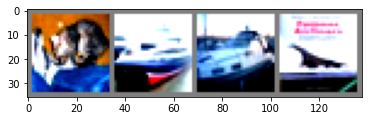

In [11]:
## checking test images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

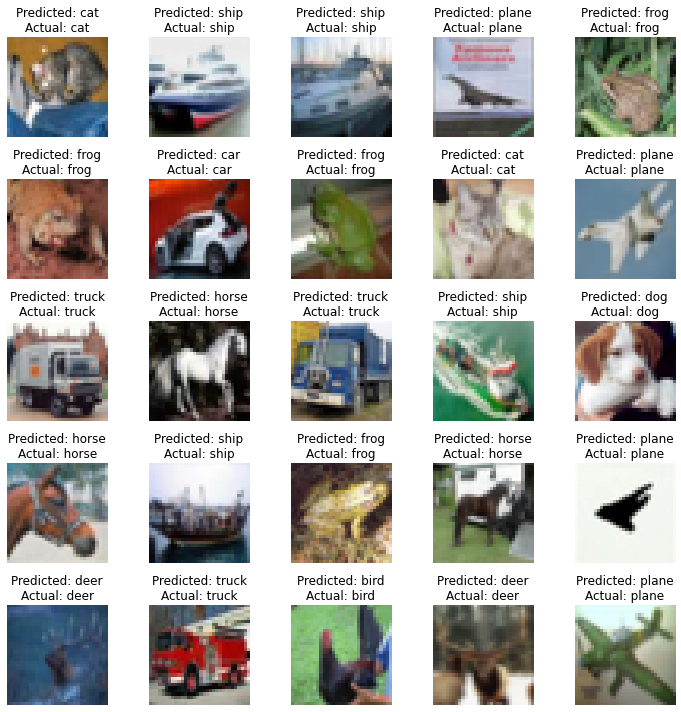

In [12]:
## correct images
plot_images(correct_imgs, classes, "correct_imgs.png")

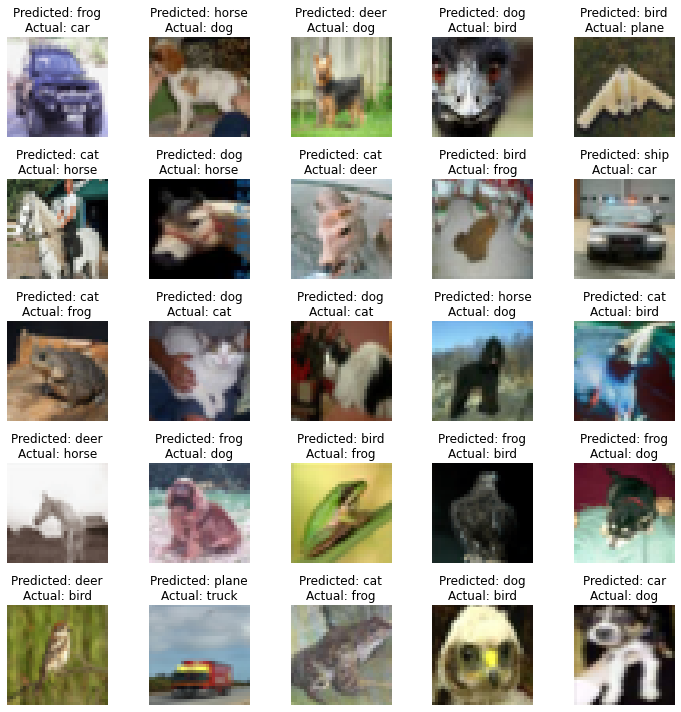

In [13]:
plot_images(misclassified_imgs, classes, "misclassified_imgs.png")

In [14]:
from accuracy_check import check_accuracy     
check_accuracy(testloader,device,model)

Accuracy of the network on the 10000 test images: 81 %


81.25